In [29]:
%matplotlib inline

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import re

In [31]:
# get loandata
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [32]:
# clean interest rate using regex - ability to replace so df objects are mutable
loansData['Interest.Rate'] = [float(re.search('^[0-9]*.[0-9]*',loan).group(0))/100 for loan in loansData['Interest.Rate']]


In [33]:
# clean fico range and get score 
loansData['FICO.Score'] = map(lambda x: int(x.split('-')[0]), loansData['FICO.Range'])

In [34]:
### create datasets for 10k and 30k regression lines

In [35]:
data10k = loansData[loansData['Amount.Requested'] == 10000].copy()  ## Talk to Kyle about proper referencing here.

In [36]:
data10k.shape

(206, 15)

In [37]:
data30k = loansData[loansData['Amount.Requested'] == 30000] 

In [76]:
# function to calculate the least squares function for different datasets
def get_ols(data):
    # extract the columns from the data frame returning a series
    intrate = data['Interest.Rate']
#     loanamt = data['Amount.Requested']
    fico = data['FICO.Score']

    # reshape the data
    # The dependent variable
    y = np.matrix(intrate).transpose()
    # The independent variables shaped as columns
    x1 = np.matrix(fico).transpose()
#     x2 = np.matrix(loanamt).transpose()

    # put the columns back together to create a matrix
    #     x = np.column_stack([x1,x2])
#     x = np.column_stack([fico])

    # create the linear model with statsmodels - # read more about stats models
    X = sm.add_constant(fico)
    model = sm.OLS(y,X)
    f = model.fit()

#     f.params  # get the parms for the calculation y = m + a(x) + b(x)

#     # show the output
#     f.summary()

    return(f, fico)

In [73]:
f.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     259.0
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           3.63e-38
Time:                        09:36:32   Log-Likelihood:                 495.66
No. Observations:                 206   AIC:                            -987.3
Df Residuals:                     204   BIC:                            -980.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0008   4.84e-05    -16.095      0.000        -0.001    -0.001
const       6.718e-05    3.4e-06     19.755      0.000      6.05e-05  7.39e-05
==============================================================================
Omnibus:                       36.868   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.160
Skew:                           1.067   Prob(JB):                     4.72e-12
Kurtosis:                       4.234   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
f, fico = get_ols(data10k)

In [62]:
fico

15825     695
48808     720
62127     695
44987     730
61703     665
67158     675
103405    675
82476     690
85644     725
85686     675
20263     745
2633      735
103874    710
96988     685
53897     685
42319     695
4168      790
28402     715
42222     670
28534     705
84283     680
8549      730
68413     695
39439     665
61683     685
71743     690
25426     735
48235     740
22993     735
50602     755
         ... 
72766     675
4843      785
8626      705
12248     795
80198     700
41741     690
93711     670
12429     680
45644     725
56391     670
88584     665
95536     660
53930     670
91702     695
59807     680
26914     780
43527     690
6712      700
42148     680
38373     710
34411     775
75837     675
26087     730
2164      680
39492     695
94839     720
86953     675
53041     760
42124     710
55610     680
Name: FICO.Score, dtype: int64

In [55]:
f

In [56]:
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     259.0
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           3.63e-38
Time:                        09:23:09   Log-Likelihood:                 495.66
No. Observations:                 206   AIC:                            -987.3
Df Residuals:                     204   BIC:                            -980.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0008   4.84e-05    -16.095      0.000        -0.001    -0.001
const       6.718e-05    3.4e-06     19.755      0.000      6.05e-05  7.39e-05
==============================================================================
Omnibus:                       36.868   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.160
Skew:                           1.067   Prob(JB):                     4.72e-12
Kurtosis:                       4.234   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
x1

matrix([[695],
        [720],
        [695],
        [730],
        [665],
        [675],
        [675],
        [690],
        [725],
        [675],
        [745],
        [735],
        [710],
        [685],
        [685],
        [695],
        [790],
        [715],
        [670],
        [705],
        [680],
        [730],
        [695],
        [665],
        [685],
        [690],
        [735],
        [740],
        [735],
        [755],
        [715],
        [730],
        [715],
        [730],
        [680],
        [705],
        [665],
        [680],
        [700],
        [680],
        [685],
        [775],
        [685],
        [710],
        [680],
        [690],
        [680],
        [700],
        [665],
        [700],
        [730],
        [675],
        [660],
        [695],
        [660],
        [705],
        [665],
        [695],
        [680],
        [710],
        [670],
        [725],
        [690],
        [690],
        [675],
        [665],
        [7

In [77]:
f.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     259.0
Date:                Thu, 11 Feb 2016   Prob (F-statistic):           3.63e-38
Time:                        09:39:27   Log-Likelihood:                 495.66
No. Observations:                 206   AIC:                            -987.3
Df Residuals:                     204   BIC:                            -980.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0008   4.84e-05    -16.095      0.000        -0.001    -0.001
const       6.718e-05    3.4e-06     19.755      0.000      6.05e-05  7.39e-05
==============================================================================
Omnibus:                       36.868   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.160
Skew:                           1.067   Prob(JB):                     4.72e-12
Kurtosis:                       4.234   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

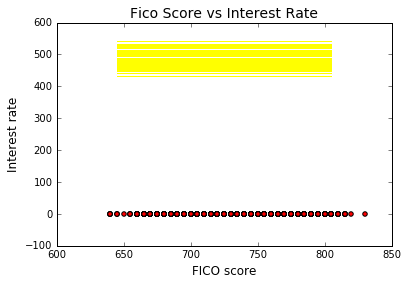

In [79]:
# It's much more convenient to just use pyplot's factory functions...
fig, ax = plt.subplots()

ax.set_title("Fico Score vs Interest Rate",fontsize=14)
ax.set_xlabel("FICO score",fontsize=12)
ax.set_ylabel("Interest rate",fontsize=12)

plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

f, x1 = get_ols(data10k)
# xdata = data10k['FICO.Score'] # just had get_ols return fico which is already shaped.
# xdata = xdata.tolist()
data10k['ydata'] = [(data10k['FICO.Score'] * f.params[0] + f.params[1]) for index, loan in data10k.iterrows()]
# ydatatemp = data10k['ydata']
# ydata = np.matrix(ydatatemp[1]).transpose()
# x2 = np.matrix(loanamt).transpose()
# ydata = ydata.tolist()
plt.plot(x1, data10k['ydata'].tolist(), c = 'yellow')
plt.show() # suppresss messages

In [75]:
f.predict([725,10000])

array([ 0.10645362])

In [71]:
f.params

array([ -7.79725444e-04,   6.71754565e-05])

In [66]:
data10k['ydata'].tolist()

[15825    -0.541842
 48808    -0.561335
 62127    -0.541842
 44987    -0.569132
 61703    -0.518450
 67158    -0.526247
 103405   -0.526247
 82476    -0.537943
 85644    -0.565234
 85686    -0.526247
 20263    -0.580828
 2633     -0.573031
 103874   -0.553538
 96988    -0.534045
 53897    -0.534045
 42319    -0.541842
 4168     -0.615916
 28402    -0.557437
 42222    -0.522349
 28534    -0.549639
 84283    -0.530146
 8549     -0.569132
 68413    -0.541842
 39439    -0.518450
 61683    -0.534045
 71743    -0.537943
 25426    -0.573031
 48235    -0.576930
 22993    -0.573031
 50602    -0.588626
             ...   
 72766    -0.526247
 4843     -0.612017
 8626     -0.549639
 12248    -0.619815
 80198    -0.545741
 41741    -0.537943
 93711    -0.522349
 12429    -0.530146
 45644    -0.565234
 56391    -0.522349
 88584    -0.518450
 95536    -0.514552
 53930    -0.522349
 91702    -0.541842
 59807    -0.530146
 26914    -0.608119
 43527    -0.537943
 6712     -0.545741
 42148    -0.530146


In [48]:
type(ydata)

numpy.matrixlib.defmatrix.matrix

In [50]:
x1[0]

matrix([[695]], dtype=int64)

In [51]:
ydata

matrix([[ 15825    -0.541842
 48808    -0.561335
 62127    -0.541842
 44987    -0.569132
 61703    -0.518450
 67158    -0.526247
 103405   -0.526247
 82476    -0.537943
 85644    -0.565234
 85686    -0.526247
 20263    -0.580828
 2633     -0.573031
 103874   -0.553538
 96988    -0.534045
 53897    -0.534045
 42319    -0.541842
 4168     -0.615916
 28402    -0.557437
 42222    -0.522349
 28534    -0.549639
 84283    -0.530146
 8549     -0.569132
 68413    -0.541842
 39439    -0.518450
 61683    -0.534045
 71743    -0.537943
 25426    -0.573031
 48235    -0.576930
 22993    -0.573031
 50602    -0.588626
             ...   
 72766    -0.526247
 4843     -0.612017
 8626     -0.549639
 12248    -0.619815
 80198    -0.545741
 41741    -0.537943
 93711    -0.522349
 12429    -0.530146
 45644    -0.565234
 56391    -0.522349
 88584    -0.518450
 95536    -0.514552
 53930    -0.522349
 91702    -0.541842
 59807    -0.530146
 26914    -0.608119
 43527    -0.537943
 6712     -0.545741
 42148    -

In [40]:
type(x1)

numpy.matrixlib.defmatrix.matrix

In [41]:
x1.shape, ydata.shape

((206L, 1L), (206L, 1L))

In [42]:
x1[:5]

matrix([[695],
        [720],
        [695],
        [730],
        [665]], dtype=int64)

In [43]:
ydata[:5]

matrix([[ 15825    -0.541842
 48808    -0.561335
 62127    -0.541842
 44987    -0.569132
 61703    -0.518450
 67158    -0.526247
 103405   -0.526247
 82476    -0.537943
 85644    -0.565234
 85686    -0.526247
 20263    -0.580828
 2633     -0.573031
 103874   -0.553538
 96988    -0.534045
 53897    -0.534045
 42319    -0.541842
 4168     -0.615916
 28402    -0.557437
 42222    -0.522349
 28534    -0.549639
 84283    -0.530146
 8549     -0.569132
 68413    -0.541842
 39439    -0.518450
 61683    -0.534045
 71743    -0.537943
 25426    -0.573031
 48235    -0.576930
 22993    -0.573031
 50602    -0.588626
             ...   
 72766    -0.526247
 4843     -0.612017
 8626     -0.549639
 12248    -0.619815
 80198    -0.545741
 41741    -0.537943
 93711    -0.522349
 12429    -0.530146
 45644    -0.565234
 56391    -0.522349
 88584    -0.518450
 95536    -0.514552
 53930    -0.522349
 91702    -0.541842
 59807    -0.530146
 26914    -0.608119
 43527    -0.537943
 6712     -0.545741
 42148    -

In [44]:
type(ydata)

numpy.matrixlib.defmatrix.matrix

In [45]:
ydata.shape

(206L, 1L)

In [46]:
type(xdata)

NameError: name 'xdata' is not defined

In [ ]:
type(fico)

In [ ]:
type(ydata)

In [ ]:
type(ydata[:1])

In [ ]:
ydata[:1][0][0]

In [ ]:
type(ydata)

In [ ]:
type(xdata)

In [ ]:
test1 = xdata.tolist()

In [ ]:
type(test1)

In [ ]:
test1[:8]


In [ ]:
f.summary()

In [ ]:
f.params

In [ ]:
f.params

In [ ]:
# # generate the data for the 10k line
# ydata10k = []
# xdata10k = []
# for index, row in data10k.iterrows():
#     ydata10k.append(f10k.params[0] + row['FICO.Score'] * f10k.params[1] + row['Interest.Rate'] * f10k.params[2])
# #     print(row['FICO.Score'], row['Interest.Rate'])
# #     xtemp = row['FICO.Score'].tolist()
#     xdata10k.append(row['FICO.Score'])

In [ ]:
# loansData10k = [loansData for loan in (loansData['Amount.Requested'] == 10000)] # tried this to get just 10k but creats a list not a df


In [ ]:
type(loansData10k)

In [ ]:
# loansData.drop('Home.Ownership')

In [ ]:
# data = data[data.population != 'sibling']

In [ ]:
type(data10k)

In [ ]:
data10k.shape

In [ ]:
# loansData['testfico'] = [loansData['FICO.Score'] for loan in loansData['Interest.Rate']] didn't work got multiple values in testfico

In [ ]:
type(loansData)

In [ ]:
# df[df.a > df.b]  # same result as the previous expression

In [ ]:
# loansData[loansData.testfico.any() > 100] does not work

In [ ]:
row1 = loansData[100:101] # grab a data point for the line

In [ ]:
row2 = loansData[200:201] # grab a second data point for the line

In [ ]:
# Create a list of Y values using row 1 and 2 from above
ytest = []
ytest.append(f.params[0] + (max(row1['FICO.Score'])* f.params[1]) + (max(row1['Interest.Rate']) * f.params[2]))
ytest.append(f.params[0] + (max(row2['FICO.Score'])* f.params[1]) + (max(row2['Interest.Rate']) * f.params[2]))

In [ ]:
ytest

In [ ]:
# put the x values in a list
# have to convert the pandas series data type to a plain list with tolist()
xtest = []
xtemp = row1['FICO.Score'].tolist()
xtest.append(xtemp[0])
xtemp = row2['FICO.Score'].tolist()
xtest.append(xtemp[0])

In [ ]:
type(xdata)

In [ ]:
type(ydata)

In [ ]:
# It's much more convenient to just use pyplot's factory functions...
fig, ax = plt.subplots()

ax.set_title("Fico Score vs Interest Rate",fontsize=14)
ax.set_xlabel("FICO score",fontsize=12)
ax.set_ylabel("Interest rate",fontsize=12)

plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

plt.plot(xdata, ydata, c = 'yellow')



In [ ]:
plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

In [ ]:
loansData['Interest.Rate'][:5]

In [ ]:
loansData['FICO.Score'][:5]

In [ ]:
loansData['Amount.Requested'][:5]

In [ ]:
x.shape

In [ ]:
my_y =[2,10]

In [ ]:
my_x = [4,20]

In [ ]:
plt.plot(my_x,my_y)

In [ ]:
loansData.plt.plot(kind='scatter', x=loansData['FICO.Score'], y=loansData['In'],color='DarkBlue')

In [ ]:
ax = loansData.plot(kind='scatter', x=intrate, y=fico,color='DarkBlue', label='Group 1')

In [ ]:
# fig, ax = plt.subplots()
# >>> fig = sm.graphics.plot_fit(results, 0, ax=ax)
# >>> ax.set_ylabel("Murder Rate")
# >>> ax.set_xlabel("Poverty Level")
# >>> ax.set_title("Linear Regression")

# fig, ax = plt.subplots()
# fig = sm.graphics.plot_fit(f, 0 , ax = ax)
# ax.set_ylabel("FICO Score")
# ax.set_xlabel("Interest Rate")
# ax.set_title("Linear Regression")

In [ ]:
df = pd.read(x)